## Titanic con Pandas, Numpy y Matplotlib

### Introducción:

Nombre del dataset: titanic.csv 

Columnas más comunes (puede variar según la fuente):

* PassengerId: identificador único del pasajero.

* Survived: 0 = no sobrevivió, 1 = sobrevivió (objetivo en ML clásico).

* Pclass: clase de ticket (1, 2, 3). Indicador socioeconómico aproximado.

* Name: nombre completo (útil para extraer título: Mr, Mrs, Miss, etc.).

* Sex: sexo (male/female).

* Age: edad (años). Suele tener valores faltantes.

* SibSp: cantidad de hermanos/esposos a bordo.

* Parch: cantidad de padres/hijos a bordo.

* Ticket: número/código de ticket (puede tener prefijos útiles).

* Fare: tarifa pagada (continua, puede tener outliers).

* Cabin: cabina (mucha ausencia; útil para Deck = letra de la cabina).

* Embarked: puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Suele tener pocos faltantes.

Nota: este trabajo se centra en Pandas/NumPy/Matplotlib. No construimos un modelo predictivo, pero dejamos el dataset listo para ello.

### Configuración inicial y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Opcional: ajustar display de pandas para tablas grandes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


# Cargar CSV
ruta = 'titanic.csv' # cambia si el archivo tiene otro nombre


df = pd.read_csv(ruta)


# Vista general
print(df.shape) # (filas, columnas)
print(df.dtypes) # tipos de datos por columna
print(df.head(3)) # primeras filas

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch  \
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0   
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  


### Lectura avanzada de CSV

In [2]:
# Si el CSV tiene separador ; en vez de ,
# df = pd.read_csv(ruta, sep=';')


# Si hay problemas con la codificación, probar:
# df = pd.read_csv(ruta, encoding='utf-8')
# df = pd.read_csv(ruta, encoding='latin-1')

### Inspección inicial (EDA rápida con Pandas)

In [3]:
# Información general
print(df.info())
print('\nValores faltantes por columna:')
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Valores faltantes por columna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          68

In [4]:
# Descriptivos numéricos
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [6]:
# Descriptivos para variables categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for c in cat_cols:
     print(f"\n{c} -> valores y frecuencias:\n", df[c].value_counts(dropna=False))


Name -> valores y frecuencias:
 Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64

Sex -> valores y frecuencias:
 Sex
male      577
female    314
Name: count, dtype: int64

Ticket -> valores y frecuencias:
 Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536           

### Distribuciones básicas (Matplotlib)

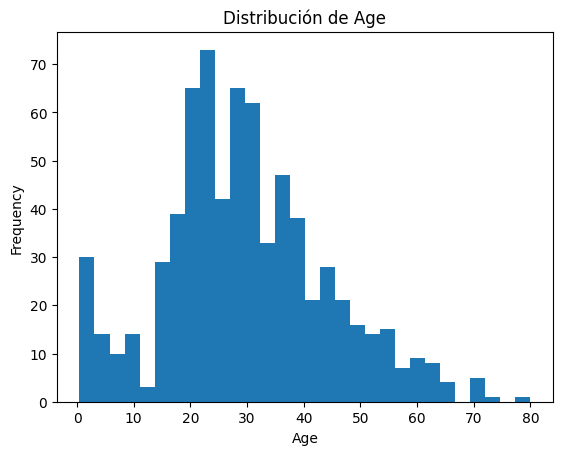

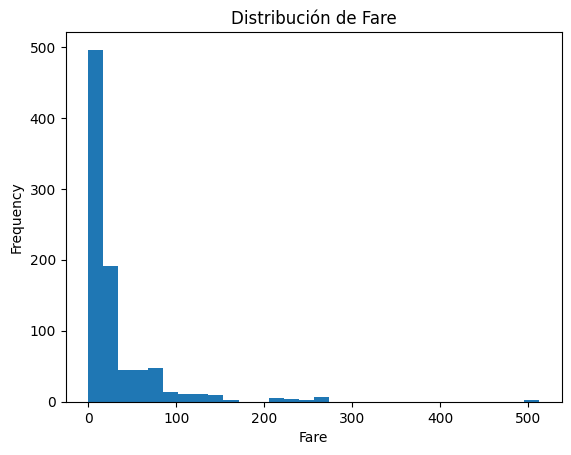

In [7]:
# Histograma de edades
plt.figure()
df['Age'].plot(kind='hist', bins=30, title='Distribución de Age')
plt.xlabel('Age')
plt.show()


# Histograma de Fare
plt.figure()
df['Fare'].plot(kind='hist', bins=30, title='Distribución de Fare')
plt.xlabel('Fare')
plt.show()

### Limpieza de datos

#### Duplicados

In [9]:
# Comprobar duplicados (por PassengerId o fila completa)
print('Duplicados por fila completa:', df.duplicated().sum())
if 'PassengerId' in df.columns:
    print('Duplicados por PassengerId:', df['PassengerId'].duplicated().sum())


# Eliminar duplicados exactos (si los hubiera)
df = df.drop_duplicates()

Duplicados por fila completa: 0
Duplicados por PassengerId: 0


#### Tipos de datos

In [10]:
# Convertir a categorías cuando corresponda
for col in ['Sex', 'Embarked']:
    if col in df.columns:
        df[col] = df[col].astype('category')


# Pclass como categoría (opcional)
if 'Pclass' in df.columns:
    df['Pclass'] = df['Pclass'].astype('category')


# Asegurar numéricos
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

#### Tratamiento de valores faltantes

In [11]:
# Revisar faltantes de nuevo
print(df.isna().sum())


# Embarked: imputar con la moda (valor más frecuente)
if 'Embarked' in df.columns and df['Embarked'].isna().any():
    moda_emb = df['Embarked'].mode(dropna=True)[0]
    df['Embarked'] = df['Embarked'].fillna(moda_emb)


# Fare: imputar con mediana por Pclass (más robusto)
if 'Fare' in df.columns and df['Fare'].isna().any():
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda s: s.fillna(s.median()))


# Age: estrategia simple -> mediana por (Sex,Pclass)
if 'Age' in df.columns and df['Age'].isna().any():
    df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda s: s.fillna(s.median()))


print('Faltantes post-imputación:\n', df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Faltantes post-imputación:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\usain\AppData\Local\Temp\ipykernel_108824\3271512099.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda s: s.fillna(s.median()))


Justificación: mediana es robusta a outliers; agrupar por Sex y Pclass captura estructura básica (edades distintas según clase/sexo). Para trabajos más avanzados, puedes usar regresión o KNN imputers.

### Ingeniería de variables (feature engineering)

#### Tamaño de familia e indicador de viajar solo

In [12]:
if set(['SibSp','Parch']).issubset(df.columns):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

#### Título (Title) desde Name

In [13]:
import re


def extract_title(name: str) -> str:
    m = re.search(r',\s*([^\.]+)\.', name)
    return m.group(1).strip() if m else 'Unknown'


if 'Name' in df.columns:
    df['Title'] = df['Name'].apply(extract_title)
    # Reducir cardinalidad: agrupar títulos raros
    rare = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
    df['Title'] = df['Title'].apply(lambda t: 'Rare' if t in rare else t)
    df['Title'] = df['Title'].astype('category')

#### Cubierta (Deck) desde Cabin

In [14]:
if 'Ticket' in df.columns:
    df['TicketPrefix'] = (df['Ticket'].astype(str)
                            .str.replace(r'\d', '', regex=True)
                            .str.replace('.', '', regex=False)
                            .str.strip())
    df['TicketPrefix'] = df['TicketPrefix'].replace('', 'NONE')
    df['TicketPrefix'] = df['TicketPrefix'].astype('category')

#### Binning de Edad y Fare (para gráficos/tablas)

In [15]:
if 'Age' in df.columns:
    bins_age = [0, 12, 18, 30, 45, 60, np.inf]
    labels_age = ['0-12','13-18','19-30','31-45','46-60','60+']
    df['AgeBin'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=True)


if 'Fare' in df.columns:
    df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=['Q1','Q2','Q3','Q4'])

### Análisis exploratorio (tablas con Pandas)

#### Supervivencia por variables categóricas

In [16]:
# Helper: tasa de supervivencia y conteos


def survival_rate_table(df, by):
    tab = pd.crosstab(df[by], df['Survived'], margins=True)
    tab.columns = ['No', 'Sí', 'Total'] if 2 in tab.columns else ['No', 'Sí']
    rate = df.groupby(by)['Survived'].mean().rename('SurvivalRate')
    return tab.join(rate)


for col in ['Sex','Pclass','Embarked','Title','Deck','TicketPrefix','IsAlone','AgeBin','FareBin']:
    if col in df.columns:
        print(f"\n==== {col} ====")
        print(survival_rate_table(df, col).sort_values('SurvivalRate', ascending=False))


==== Sex ====


ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

#### Estadística por grupo (groupby/agg)

In [17]:
# Ejemplo: promedio de Age y Fare por (Pclass, Sex)
if set(['Pclass','Sex','Age','Fare']).issubset(df.columns):
    agg_tbl = df.groupby(['Pclass','Sex']).agg(
        mean_age=('Age','mean'),
        median_age=('Age','median'),
        mean_fare=('Fare','mean'),
        median_fare=('Fare','median'),
        survival_rate=('Survived','mean')
    ).round(2)
    print(agg_tbl)

               mean_age  median_age  mean_fare  median_fare  survival_rate
Pclass Sex                                                                
1      female     34.65        35.0     106.13        82.66           0.97
       male       41.06        40.0      67.23        41.26           0.37
2      female     28.70        28.0      21.97        22.00           0.92
       male       30.68        30.0      19.74        13.00           0.16
3      female     21.68        21.5      16.12        12.48           0.50
       male       26.10        25.0      12.66         7.92           0.14


C:\Users\usain\AppData\Local\Temp\ipykernel_108824\2292832881.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_tbl = df.groupby(['Pclass','Sex']).agg(


#### Correlaciones numéricas

In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
print(corr.round(3))

             PassengerId  Survived    Age  SibSp  Parch   Fare  FamilySize  IsAlone
PassengerId        1.000    -0.005  0.039 -0.058 -0.002  0.013      -0.040    0.057
Survived          -0.005     1.000 -0.060 -0.035  0.082  0.257       0.017   -0.203
Age                0.039    -0.060  1.000 -0.250 -0.176  0.123      -0.258    0.176
SibSp             -0.058    -0.035 -0.250  1.000  0.415  0.160       0.891   -0.584
Parch             -0.002     0.082 -0.176  0.415  1.000  0.216       0.783   -0.583
Fare               0.013     0.257  0.123  0.160  0.216  1.000       0.217   -0.272
FamilySize        -0.040     0.017 -0.258  0.891  0.783  0.217       1.000   -0.691
IsAlone            0.057    -0.203  0.176 -0.584 -0.583 -0.272      -0.691    1.000


Tip: para correlación entre categóricas (p.ej. Sex y Survived), suele usarse Chi-cuadrado o Cramér’s V (no incluido por defecto en pandas). Aquí mostramos cómo calcular Cramér’s V.

In [21]:
#pip install scipy

In [22]:
# Cramér's V para dos categóricas
from math import sqrt
from scipy.stats import chi2_contingency # si no lo tienes, pip install scipy


def cramers_v(x, y):
    tbl = pd.crosstab(x, y)
    chi2 = chi2_contingency(tbl)[0]
    n = tbl.sum().sum()
    r, k = tbl.shape
    return sqrt(chi2 / (n * (min(r-1, k-1))))


if set(['Sex','Survived']).issubset(df.columns):
    print('Cramér V (Sex vs Survived):', round(cramers_v(df['Sex'], df['Survived']), 3))

Cramér V (Sex vs Survived): 0.541


### Visualizaciones con Matplotlib

#### Barras: tasa de supervivencia por categoría

C:\Users\usain\AppData\Local\Temp\ipykernel_108824\95298661.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_sex = df.groupby('Sex')['Survived'].mean()


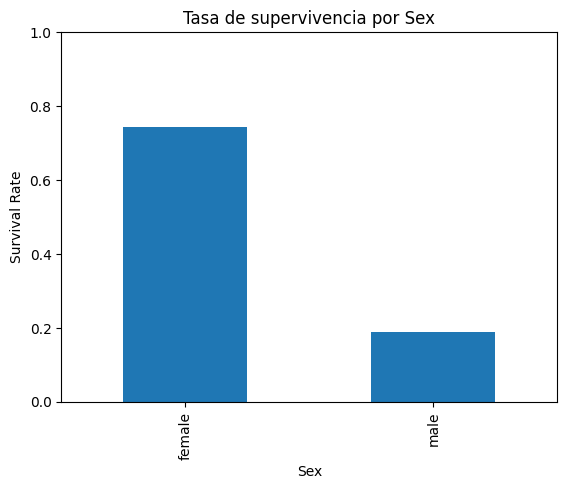

C:\Users\usain\AppData\Local\Temp\ipykernel_108824\95298661.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate_pclass = df.groupby('Pclass')['Survived'].mean()


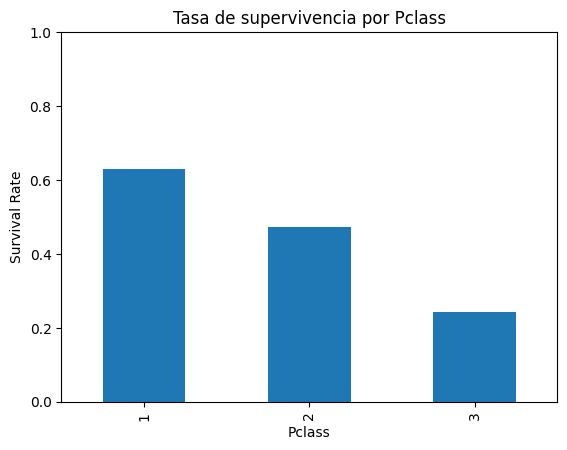

In [23]:
# Supervivencia por Sex
if set(['Sex','Survived']).issubset(df.columns):
    rate_sex = df.groupby('Sex')['Survived'].mean()
    plt.figure()
    rate_sex.plot(kind='bar', title='Tasa de supervivencia por Sex')
    plt.ylabel('Survival Rate')
    plt.xlabel('Sex')
    plt.ylim(0,1)
    plt.show()


# Supervivencia por Pclass
if set(['Pclass','Survived']).issubset(df.columns):
    rate_pclass = df.groupby('Pclass')['Survived'].mean()
    plt.figure()
    rate_pclass.plot(kind='bar', title='Tasa de supervivencia por Pclass')
    plt.ylabel('Survival Rate')
    plt.xlabel('Pclass')
    plt.ylim(0,1)
    plt.show()

#### Boxplots: Fare por Pclass y por Survived

<Figure size 640x480 with 0 Axes>

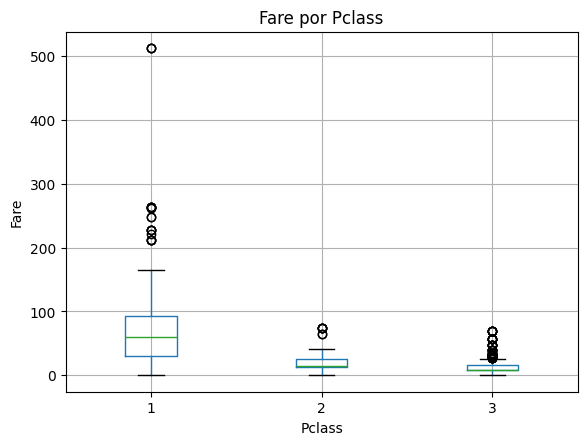

<Figure size 640x480 with 0 Axes>

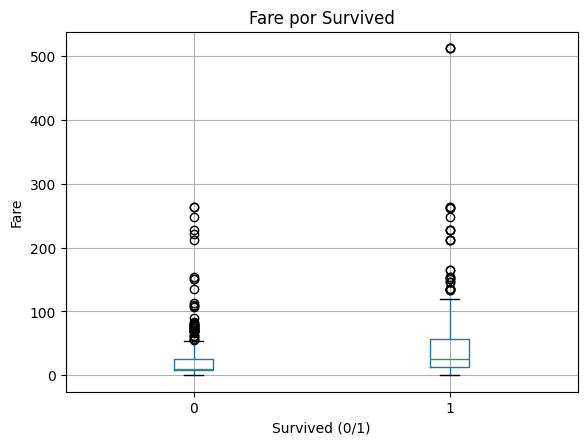

In [24]:
# Boxplot Fare ~ Pclass
if set(['Fare','Pclass']).issubset(df.columns):
    plt.figure()
    df.boxplot(column='Fare', by='Pclass')
    plt.title('Fare por Pclass')
    plt.suptitle('')
    plt.xlabel('Pclass')
    plt.ylabel('Fare')
    plt.show()


# Boxplot Fare ~ Survived
if set(['Fare','Survived']).issubset(df.columns):
    plt.figure()
    df.boxplot(column='Fare', by='Survived')
    plt.title('Fare por Survived')
    plt.suptitle('')
    plt.xlabel('Survived (0/1)')
    plt.ylabel('Fare')
    plt.show()

#### Hist + KDE simple (densidad) para Age según Survived

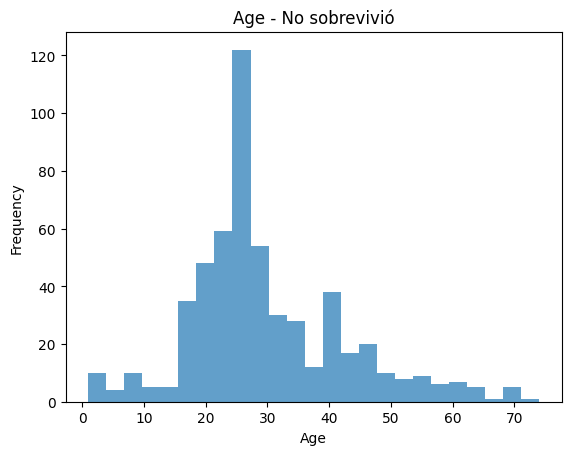

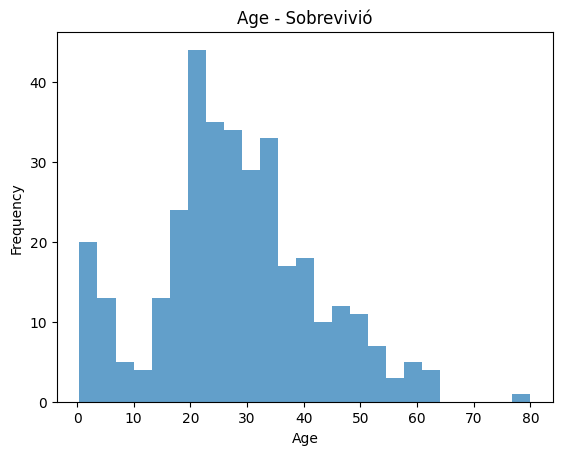

In [25]:
# Histograma superpuesto por supervivencia (dos figuras separadas para cumplir regla)
if set(['Age','Survived']).issubset(df.columns):
    plt.figure()
    df[df['Survived']==0]['Age'].plot(kind='hist', bins=25, alpha=0.7, title='Age - No sobrevivió')
    plt.xlabel('Age')
    plt.show()


    plt.figure()
    df[df['Survived']==1]['Age'].plot(kind='hist', bins=25, alpha=0.7, title='Age - Sobrevivió')
    plt.xlabel('Age')
    plt.show()

#### Heatmap simple de correlación numerica

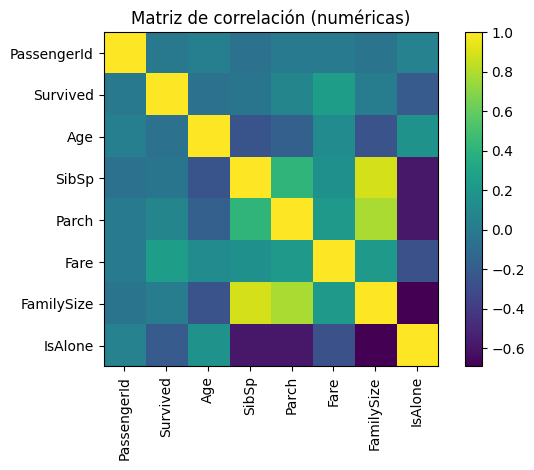

In [26]:
plt.figure()
plt.imshow(corr, interpolation='nearest')
plt.title('Matriz de correlación (numéricas)')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

#### Dispersión: Age vs Fare (coloreando por Survived mediante máscaras)

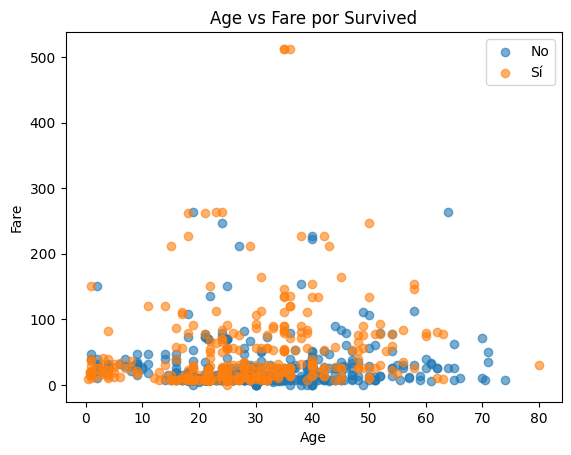

In [27]:
if set(['Age','Fare','Survived']).issubset(df.columns):
    plt.figure()
    mask0 = df['Survived']==0
    mask1 = df['Survived']==1
    plt.scatter(df.loc[mask0,'Age'], df.loc[mask0,'Fare'], label='No', alpha=0.6)
    plt.scatter(df.loc[mask1,'Age'], df.loc[mask1,'Fare'], label='Sí', alpha=0.6)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Age vs Fare por Survived')
    plt.legend()
    plt.show()

### Buenas prácticas de Pandas (índices, filtros, orden, apply/map)

#### Indexación y filtros

In [28]:
# loc: por etiqueta; iloc: por posición
if 'Fare' in df.columns:
    caros = df.loc[df['Fare'] > df['Fare'].median()]
    print('Pasajeros con Fare > mediana:', caros.shape)


# Selección de columnas y filas específicas
subset = df.loc[df['Survived']==1, ['PassengerId','Sex','Pclass','Age','Fare']].head(10)
print(subset)

Pasajeros con Fare > mediana: (444, 18)
    PassengerId     Sex Pclass   Age     Fare
1             2  female      1  38.0  71.2833
2             3  female      3  26.0   7.9250
3             4  female      1  35.0  53.1000
8             9  female      3  27.0  11.1333
9            10  female      2  14.0  30.0708
10           11  female      3   4.0  16.7000
11           12  female      1  58.0  26.5500
15           16  female      2  55.0  16.0000
17           18    male      2  30.0  13.0000
19           20  female      3  21.5   7.2250


#### Ordenamiento y valores únicos

In [30]:
if 'Fare' in df.columns:
    print(df['Fare'].nlargest(5))


for c in ['Embarked','TicketPrefix','Title']:
    if c in df.columns:
        print(c, '->', df[c].unique()[:10])

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: Fare, dtype: float64
Embarked -> ['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']
TicketPrefix -> ['A/', 'PC', 'STON/O', 'NONE', 'PP', 'CA', 'SC/Paris', 'SC/A', 'SP', 'SOC']
Categories (33, object): ['A', 'A/', 'A/S', 'C', ..., 'SW/PP', 'W/C', 'WE/P', 'WEP']
Title -> ['Mr', 'Mrs', 'Miss', 'Master', 'Rare', 'the Countess']
Categories (6, object): ['Master', 'Miss', 'Mr', 'Mrs', 'Rare', 'the Countess']


#### Reemplazos y transformaciones ligeras

In [31]:
# map / replace
df['Sex_num'] = df['Sex'].map({'male':0, 'female':1}) if 'Sex' in df.columns else np.nan


# apply fila a fila (cuidado con performance si el df es grande)
if set(['Age','Fare']).issubset(df.columns):
    def cheap_young(row):
        return int((row['Age'] < 18) and (row['Fare'] < df['Fare'].median()))
    df['CheapYoung'] = df.apply(cheap_young, axis=1)

#### Pivot tables

In [32]:
if set(['Survived','Pclass','Sex']).issubset(df.columns):
    pvt = pd.pivot_table(df, index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
    print(pvt)

Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


C:\Users\usain\AppData\Local\Temp\ipykernel_108824\2070224314.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvt = pd.pivot_table(df, index='Pclass', columns='Sex', values='Survived', aggfunc='mean')


#### Outliers y escalas básicas

In [33]:
# Regla IQR simple para Fare
if 'Fare' in df.columns:
    q1, q3 = df['Fare'].quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = df[(df['Fare'] < low) | (df['Fare'] > high)]
    print('Outliers en Fare:', outliers.shape[0])

Outliers en Fare: 116


Nota: no eliminamos outliers por defecto; en lugar de eso, reportamos y evaluamos su impacto.

### Guardar resultados y versión “lista para modelado”

In [34]:
# Seleccionar un subconjunto limpio (ejemplo)
cols_keep = [c for c in df.columns if c not in ['Name','Ticket','Cabin']]
df_ready = df[cols_keep].copy()


# Guardar CSV y (opcional) Parquet
df_ready.to_csv('titanic_ready.csv', index=False)
# df_ready.to_parquet('titanic_ready.parquet', index=False)


print('Archivo final escrito: titanic_ready.csv')

Archivo final escrito: titanic_ready.csv


In [35]:
# Vectorización con where: ejemplo de banda tarifaria
if 'Fare' in df.columns:
    median_fare = df['Fare'].median()
    df['FareHigh'] = np.where(df['Fare'] > median_fare, 1, 0)


# Percentiles con NumPy
if 'Age' in df.columns:
    p = np.percentile(df['Age'].dropna(), [5, 25, 50, 75, 95])
    print('Percentiles Age 5/25/50/75/95:', p)


# Generación reproducible (semilla aleatoria)
np.random.seed(42)
rand_sample = np.random.choice(df.index, size=min(5, len(df)), replace=False)
print('Muestreo aleatorio de índices:', rand_sample)

Percentiles Age 5/25/50/75/95: [ 6.  21.5 26.  36.  54. ]
Muestreo aleatorio de índices: [709 439 840 720  39]
